In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
data = pd.read_csv("demographics.csv")

In [2]:
# Cleaning data, droping all the blanks
data = data.dropna()
data

,Member,MB Gender,MB race,Sales,Age
1,Jun Christine Lee,female,Chinese,663.2,5.0
2,JOANNE TSE,female,Chinese,105.37,40.0
3,SHAMINI,female,Indian,28.8,30.0
4,SUE,female,Malay,165.09,41.0
6,ngh3,female,Others,66.37,5.0
...,...,...,...,...,...
46209,lai teck chuan,male,Chinese,478.23,32.0
46210,marcus teo,male,Chinese,297.95,49.0
46211,CECILIA ONG,female,Chinese,"1,105.78",58.0
46212,candy,female,Chinese,83.46,28.0


In [3]:
# Changing string into numerical values (Gender)
data['MB Gender'] = data['MB Gender'].replace({'female':'1', 'male':'0'})

In [4]:
# Changing string into numerical values (Race)
data['MB race'] = data['MB race'].replace({'Chinese':'0', 'Indian':'1', 'Malay':'2', 'Others':'3'})

In [5]:
# Display the data to check if it's right
data

,Member,MB Gender,MB race,Sales,Age
1,Jun Christine Lee,1,0,663.2,5.0
2,JOANNE TSE,1,0,105.37,40.0
3,SHAMINI,1,1,28.8,30.0
4,SUE,1,2,165.09,41.0
6,ngh3,1,3,66.37,5.0
...,...,...,...,...,...
46209,lai teck chuan,0,0,478.23,32.0
46210,marcus teo,0,0,297.95,49.0
46211,CECILIA ONG,1,0,"1,105.78",58.0
46212,candy,1,0,83.46,28.0


In [6]:
# Cleaning age
data.drop(data[data['Age'] < 15].index, inplace = True) 
data.drop(data[data['Age'] > 70].index, inplace = True) 
data

,Member,MB Gender,MB race,Sales,Age
2,JOANNE TSE,1,0,105.37,40.0
3,SHAMINI,1,1,28.8,30.0
4,SUE,1,2,165.09,41.0
7,jacqueline lim,1,0,"1,825.48",37.0
8,GERALDINE A/P DORAISAMY ANTHONY,1,1,"1,516.28",63.0
...,...,...,...,...,...
46209,lai teck chuan,0,0,478.23,32.0
46210,marcus teo,0,0,297.95,49.0
46211,CECILIA ONG,1,0,"1,105.78",58.0
46212,candy,1,0,83.46,28.0


In [7]:
# Creating age custom groups
age18_25 = data.Age[(data.Age <= 25) & (data.Age >= 18)]
age26_35 = data.Age[(data.Age <= 35) & (data.Age >= 26)]
age36_45 = data.Age[(data.Age <= 45) & (data.Age >= 36)]
age46_55 = data.Age[(data.Age <= 55) & (data.Age >= 46)]
age55above = data.Age[data.Age >= 56]

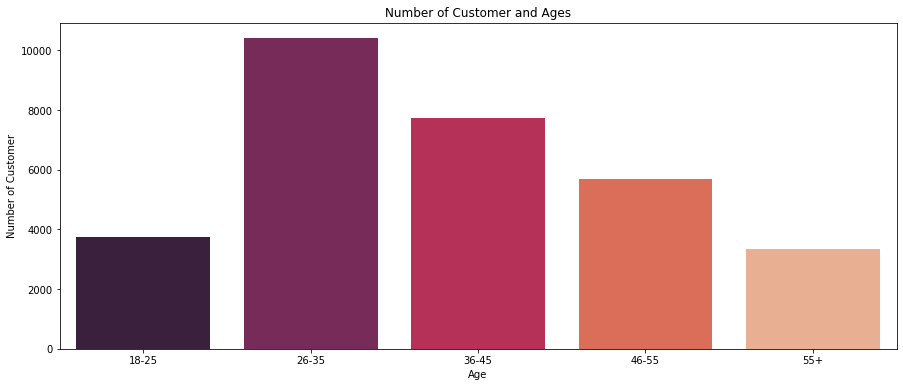

In [8]:
# Plotting age in a graph to show distribution of age
x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

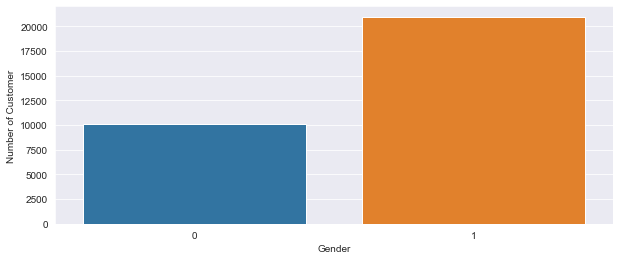

In [9]:
# Plotting gender 
MB_Gender = data['MB Gender'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=MB_Gender.index, y=MB_Gender.values)
plt.xlabel("Gender")
plt.ylabel("Number of Customer")
plt.show()

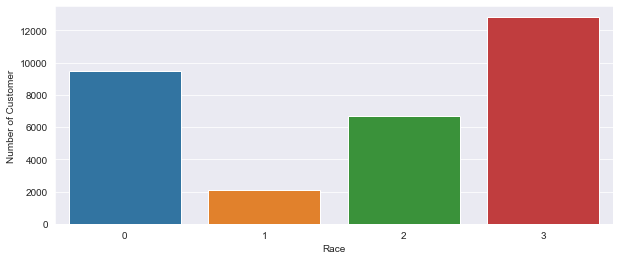

In [10]:
# Plotting race
MB_race = data['MB race'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=MB_race.index, y=MB_race.values)
plt.xlabel("Race")
plt.ylabel("Number of Customer")
plt.show()

In [11]:
# Importing necessary libraries for k-means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler 


In [12]:
# Drop Member column, as it is not needed
data=data.drop(['Member'], axis=1)
data

,MB Gender,MB race,Sales,Age
2,1,0,105.37,40.0
3,1,1,28.8,30.0
4,1,2,165.09,41.0
7,1,0,"1,825.48",37.0
8,1,1,"1,516.28",63.0
...,...,...,...,...
46209,0,0,478.23,32.0
46210,0,0,297.95,49.0
46211,1,0,"1,105.78",58.0
46212,1,0,83.46,28.0


In [13]:
# Converting strings to numeric
data['Sales'] = pd.to_numeric(data['Sales'],errors='coerce')

In [14]:
# Scaling the dataset
mms=MinMaxScaler()
mms.fit(data)
data_transformed=mms.transform(data)

In [15]:
data_transformed

array([[1.        , 0.        , 0.5335551 , 0.45454545],
       [1.        , 0.33333333, 0.49363102, 0.27272727],
       [1.        , 0.66666667, 0.56469349, 0.47272727],
       ...,
       [1.        , 0.        ,        nan, 0.78181818],
       [1.        , 0.        , 0.52213109, 0.23636364],
       [0.        , 1.        ,        nan, 0.25454545]])

In [16]:
# Convert to Dataframe
data_transformed=pd.DataFrame(data_transformed, columns=['MB Gender', 'MB race', 'Sales', 'Age' ])
data_transformed

,MB Gender,MB race,Sales,Age
0,1.0,0.000000,0.533555,0.454545
1,1.0,0.333333,0.493631,0.272727
2,1.0,0.666667,0.564693,0.472727
3,1.0,0.000000,NaN,0.400000
4,1.0,0.333333,NaN,0.872727
...,...,...,...,...
31123,0.0,0.000000,0.727967,0.309091
31124,0.0,0.000000,0.633968,0.618182
31125,1.0,0.000000,NaN,0.781818
31126,1.0,0.000000,0.522131,0.236364


<function matplotlib.pyplot.show(*args, **kw)>

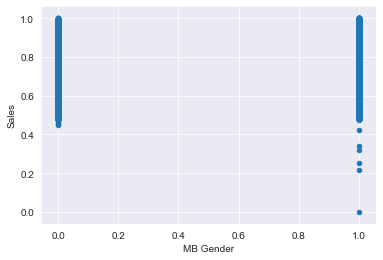

In [17]:
# Plotting dataset after scalling
data_transformed.plot(kind='scatter', x='MB Gender', y='Sales')
plt.show

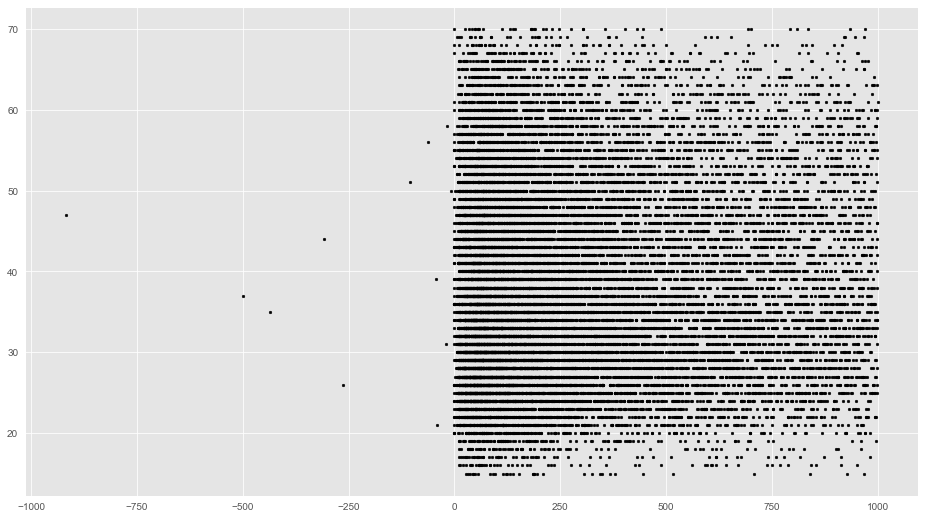

In [18]:
import matplotlib.pyplot as plt
x = data.iloc[:,:].values
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
plt.scatter(x[:,2],x[:,3],c='black',s=7)